# Lead scoring

This notebook outlines a lead scoring use case that predicts whether a prospect will become a customer. You can frame this use case as a binary classification problem.

The dataset used in this notebook is from the UCI Machine Learning Repository and includes information from a direct telemarketing campaign of a Portuguese bank. It was published in a paper by Sérgio Moro and colleagues in 2014. The target is indicated by the feature “**y**”; a “yes” means that the prospect purchased the product being offered and “no” means that they did not.
 

*[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014*

## Prerequisites

* A DataRobot login 
* A <a href="https://docs.datarobot.com/en/docs/platform/account-mgmt/acct-settings/api-key-mgmt.html">DataRobot API key</a>
* [The sample training dataset](bank-full.csv)
* Python 3.7+
* DataRobot API version 2.21+

## Setup

### Import Libraries

In [ ]:
import datarobot as dr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Connect to DataRobot

In [ ]:
# If the config file is not in the default location described in the API Quickstart guide, '~/.config/datarobot/drconfig.yaml', then you will need to call
# dr.Client(config_path='path-to-drconfig.yaml')

Read more about different options for [connecting to DataRobot from the client](https://docs.datarobot.com/en/docs/api/api-quickstart/api-qs.html).

### Upload a dataset

In [4]:
data_path = "https://docs.datarobot.com/en/docs/api/guide/common-case/bank-full.csv"

df = pd.read_csv(data_path)  # Add your dataset here
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

## Create a project

Start the project with the dataset **bank-full.csv** and indicate the target as “**y**”.  Set the Autopilot modeling mode to "**Quick**".


In [17]:
project = dr.Project.create(project_name='Lead-Scoring',
                        sourcedata= df)
)

In [ ]:
project.analyze_and_model(target="y", worker_count="-1")

project.wait_for_autopilot()  # Wait for autopilot to complete

It can be onerous to rerun Autopilot every time you want to run the script.  If your project is already created, then comment out the last line of code above to ensure you do not rerun Autopilot.  You can then simply refer to the project using the `GetProject` function (uncomment and use the code below).


In [19]:
# project = dr.Project.get(project_id='YOUR_PROJECT_ID')

## Select a model to evaluate

DataRobot recommends evaluating the 80% version of the top model using the code below.

In [ ]:
model = project.get_top_model
model.id

### Get validation scores

You can get the validation and cross-validation scores for every possible metric of the model using the code below.  You can also pull these scores for multiple models if you want to compare them programmatically.

In [ ]:
model.metrics

### ROC Curve

After obtaining the overall performance of the model, you can plot the ROC curve using the code below.

In [39]:
roc = model.get_roc_curve("crossValidation")

# Save the result into a pandas dataframe
df = pd.DataFrame(roc.roc_points)
df.head()

accuracy  f1_score  false_negative_score  true_negative_score  \
0  0.883021  0.000000                  4231                31938   
1  0.883049  0.000473                  4230                31938   
2  0.884542  0.029289                  4168                31930   
3  0.888772  0.110939                  3980                31895   
4  0.889657  0.131069                  3930                31877   

   true_positive_score  false_positive_score  true_negative_rate  \
0                    0                     0            1.000000   
1                    1                     0            1.000000   
2                   63                     8            0.999750   
3                  251                    43            0.998654   
4                  301                    61            0.998090   

   false_positive_rate  true_positive_rate  matthews_correlation_coefficient  \
0             0.000000            0.000000                          0.000000   
1             0.000000            0.000236                          0.014447   
2             0.000250            0.014890                          0.106300   
3             0.001346            0.059324                          0.207523   
4             0.001910            0.071142                          0.223533   

   positive_predictive_value  negative_predictive_value  threshold  \
0                   0.000000                   0.883021   1.000000   
1                   1.000000                   0.883046   0.980059   
2                   0.887324                   0.884537   0.930287   
3                   0.853741                   0.889059   0.875943   
4                   0.831492                   0.890245   0.862702   

   fraction_predicted_as_positive  fraction_predicted_as_negative  \
0                        0.000000                        1.000000   
1                        0.000028                        0.999972   
2                        0.001963                        0.998037   
3                        0.008129                        0.991871   
4                        0.010009                        0.989991   

   lift_positive  lift_negative  
0       0.000000       1.000000  
1       8.548570       1.000028  
2       7.585351       1.001716  
3       7.298269       1.006838  
4       7.108065       1.008180

In [ ]:
dr_roc_green = "#03c75f"
white = "#ffffff"
dr_purple = "#65147D"
dr_dense_green = "#018f4f"
dr_dark_blue = "#08233F"

fig = plt.figure(figsize=(8, 8))
axes = fig.add_subplot(1, 1, 1, facecolor=dr_dark_blue)

plt.scatter(df.false_positive_rate, df.true_positive_rate, color=dr_roc_green)
plt.plot(df.false_positive_rate, df.true_positive_rate, color=dr_roc_green)
plt.plot([0, 1], [0, 1], color=white, alpha=0.25)
plt.title("ROC curve")
plt.xlabel("False Positive Rate (Fallout)")
plt.xlim([0, 1])
plt.ylabel("True Positive Rate (Sensitivity)")
plt.ylim([0, 1])

View a sample ROC Curve below.

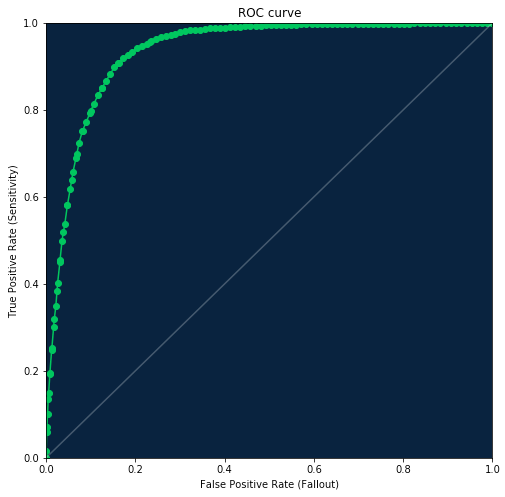

In [5]:
from IPython import display

display.Image("./roccurve.png")

### Get Feature Impact

Use the code below to understand which features have the highest impact on driving model decisions.

In [46]:
# Get Feature Impact
feature_impact = model.get_or_request_feature_impact()

# Save feature impact in pandas dataframe
fi_df = pd.DataFrame(feature_impact)
fi_df

redundantWith featureName  impactNormalized  impactUnnormalized
0           None    duration          1.000000            0.256413
1           None       month          0.370865            0.095095
2           None         day          0.186467            0.047813
3           None     contact          0.116615            0.029902
4           None    poutcome          0.086397            0.022153
5           None     balance          0.080238            0.020574
6           None         age          0.070169            0.017992
7           None     housing          0.065196            0.016717
8           None       pdays          0.055162            0.014144
9           None    campaign          0.053662            0.013760
10          None   education          0.024921            0.006390
11          None         job          0.023866            0.006120
12          None     marital          0.018290            0.004690
13          None    previous          0.010864            0.002786
14          None        loan          0.008976            0.002302
15          None     default          0.001796            0.000461

Feature Impact is calculated using [permutation](https://docs.datarobot.com/en/docs/modeling/analyze-models/understand/feature-impact.html#shared-permutation-based-feature-impact). In the example output above, the most impactful feature is **duration**, followed by **month** and **day**.  To plot these Feature Impact scores:



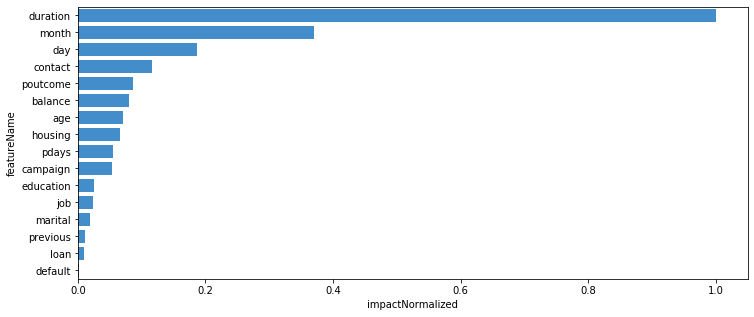

In [55]:
fig, ax = plt.subplots(figsize=(12, 5))

# Plot feature impact
sns.barplot(x="impactNormalized", y="featureName", data=fi_df, color="#2D8FE2")

## Unlock holdout

By default, DataRobot uses a five-fold cross-validation and 20% holdout <a href="https://docs.datarobot.com/en/docs/modeling/reference/model-detail/data-partitioning.html">partitioning</a>. The holdout data is not used during model training, however you can unlock it and pull the new scores to see how your model predicts on new data. 

In [56]:
training_predictions_job = model.request_training_predictions(dr.enums.DATA_SUBSET.HOLDOUT)
training_predictions = training_predictions_job.get_result_when_complete()

Use the code below to download the predicitions as a CSV.

In [62]:
training_predictions.download_to_csv("predictions.csv")